# Binary Classification: Simple Logistic Regression with Sklearn

To apply the Logistic Regression model in practical usage, let us consider a DMV Test dataset which consists of three columns. The first two columns consist of the two DMV written tests (DMV_Test_1 and DMV_Test_2) which are the independent variables and the last column consists of the dependent variable, Results which denote that the driver has got the license (1) or not (0).
In this, we have to build a Logistic Regression model using this data to predict if a driver who has taken the two DMV written tests will get the license or not using those marks obtained in their written tests and classify the results.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from matplotlib.colors import ListedColormap
plt.style.use("seaborn-whitegrid")

## Load data

In [2]:
# load data and store in df
url = 'https://raw.githubusercontent.com/mk-gurucharan/Classification/master/DMVWrittenTests.csv'
df = pd.read_csv(url)
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


## Explore data

In [3]:
# show descriptive statistics
df.describe()

,DMV_Test_1,DMV_Test_2,Results
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Declare features and targets

In [4]:
# create feature (X) and target (y) variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Scale features

In [5]:
# create and fit scaler
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
# standardize features
X_scaled = scaler.transform(X)

## Train-Test Split

In [7]:
# 75:25 split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

## Train model

In [8]:
# build and train model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Test model

In [9]:
# make predictions and test model 
yhat = classifier.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1])

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, yhat)
print ("Accuracy : ", accuracy_score(y_test, yhat))
print(cm)

Accuracy :  0.84
[[ 8  1]
 [ 3 13]]


In [11]:
# show actuals and predictions in a df
eval_df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':yhat})
eval_df

,Real Values,Predicted Values
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,1
9,0,0


## Visualize test results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


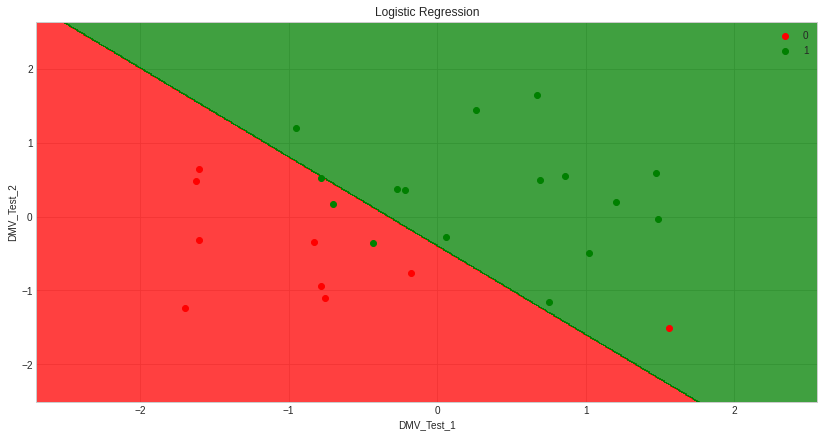

In [12]:
# plot results of regression to show correct and incorrect classification results
plt.figure(figsize=(14,7))

X_set, y_set = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.legend(facecolor="white")
plt.title('Logistic Regression')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.show()

In this graph, the value 1 (i.e, Yes) is plotted in “Red” color and the value 0 (i.e, No) is plotted in “Green” color. The Logistic Regression line separates the two regions. Thus, any data with the two data points (DMV_Test_1 and DMV_Test_2) given, can be plotted on the graph and depending upon which region if falls in, the result (Getting the Driver’s License) can be classified as Yes or No.